In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

plt.style.use('fivethirtyeight')

%matplotlib inline

params = {'legend.fontsize': 14,
          'figure.figsize': (15,8),
         'axes.labelsize': 14,
         'axes.titlesize':14,
         'xtick.labelsize':14,
         'ytick.labelsize':14,
         'axes.facecolor': 'white',
         'axes.edgecolor': 'white',
         'axes.grid': 'False',
         'figure.facecolor': 'white'}
plt.rcParams.update(params)

In [19]:
# Leer datos demográficos noviembre 2018 para calcular actuaciones por distrito ponderadas por habitantes
demo = pd.read_csv('201812_Rango_Edades_Seccion_201811.csv',encoding = 'iso-8859-1',delimiter = ';')
# Crear nuevos campos. Convertir primero NaN a 0
demo.fillna(0, inplace=True)
demo['habitantes'] = demo['EspanolesHombres']+demo['EspanolesMujeres']+demo['ExtranjerosHombres']+demo['ExtranjerosMujeres']
demo_distrito = demo.groupby(['DESC_DISTRITO'])['habitantes'].sum().reset_index()

In [20]:
# Leer datos del censo de mascotas
mas = pd.read_csv('201902_censo_mascotas.csv',encoding = 'iso-8859-1',delimiter = ';')

# Calcular nº total de mascotas
mas['total'] = mas['perros'] + mas['gatos']
mas.head()

,year,distrito,perros,gatos,total
0,2017,ARGANZUELA,10808,3668,14476
1,2017,BARAJAS,5270,1064,6334
2,2017,CARABANCHEL,19964,4263,24227
3,2017,CENTRO,15775,6752,22527
4,2017,CHAMARTÍN,11894,3123,15017


In [21]:
# Estudio de evolución del total de mascotas
evol_year = mas.groupby(['year'])['total'].sum().reset_index()
evol_year['change'] = (evol_year['total'] / evol_year['total'].shift(1) - 1)*100
evol_year

,year,total,change
0,2014,304666,NaN
1,2015,313072,2.759087
2,2016,339930,8.578857
3,2017,354769,4.365311


In [22]:
# Estudiamos los datos de 2017 agrupando por distritos
distritos = mas[mas['year'] == 2017].reset_index()
distritos.head()

,index,year,distrito,perros,gatos,total
0,0,2017,ARGANZUELA,10808,3668,14476
1,1,2017,BARAJAS,5270,1064,6334
2,2,2017,CARABANCHEL,19964,4263,24227
3,3,2017,CENTRO,15775,6752,22527
4,4,2017,CHAMARTÍN,11894,3123,15017


In [23]:
# Juntar datos de demografia con datos de mascotas
distritos.sort_values(['distrito'], ascending = False, inplace = True)
demo_distrito.sort_values(['DESC_DISTRITO'], ascending = False, inplace = True)
distritos = pd.merge(distritos, demo_distrito, how="inner", left_index= True, right_index= True)

distritos['perros/hab'] = distritos['perros'] / distritos['habitantes']*1000
distritos['gatos/hab'] = distritos['gatos'] / distritos['habitantes']*1000


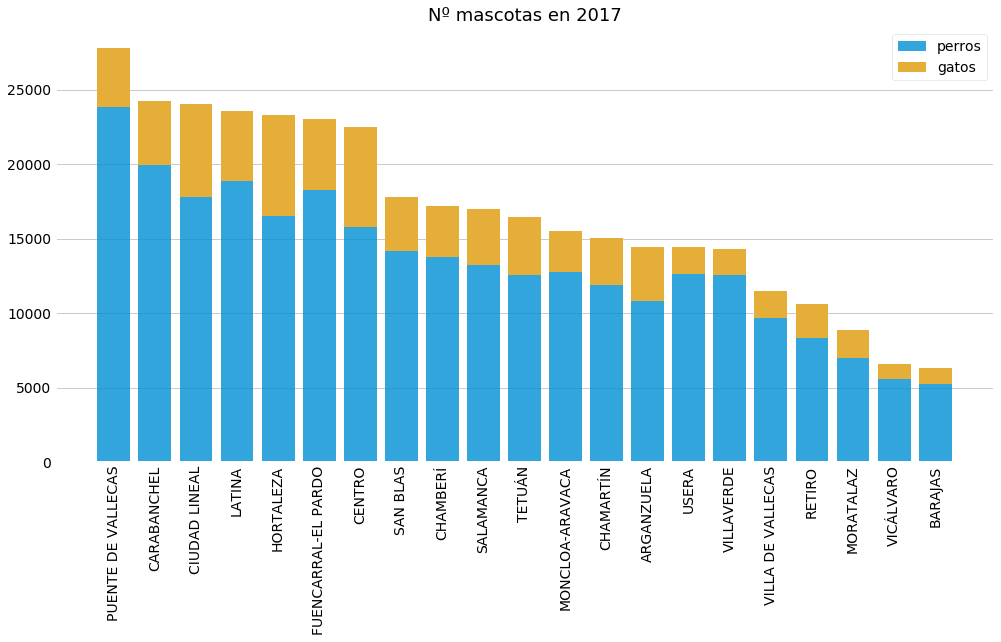

In [24]:
# dibujar mascotas por distritos
distritos.sort_values(['total'], ascending = False, inplace = True)

x = distritos['distrito']
y1 = distritos['perros']
y2 = distritos['gatos']

plt.bar(x, y1, alpha=0.8, color=sns.color_palette()[0], label = 'perros')
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2], bottom = y1, label = 'gatos')

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Nº mascotas en 2017',fontsize= 18)
plt.savefig('images/mascotas_2017.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

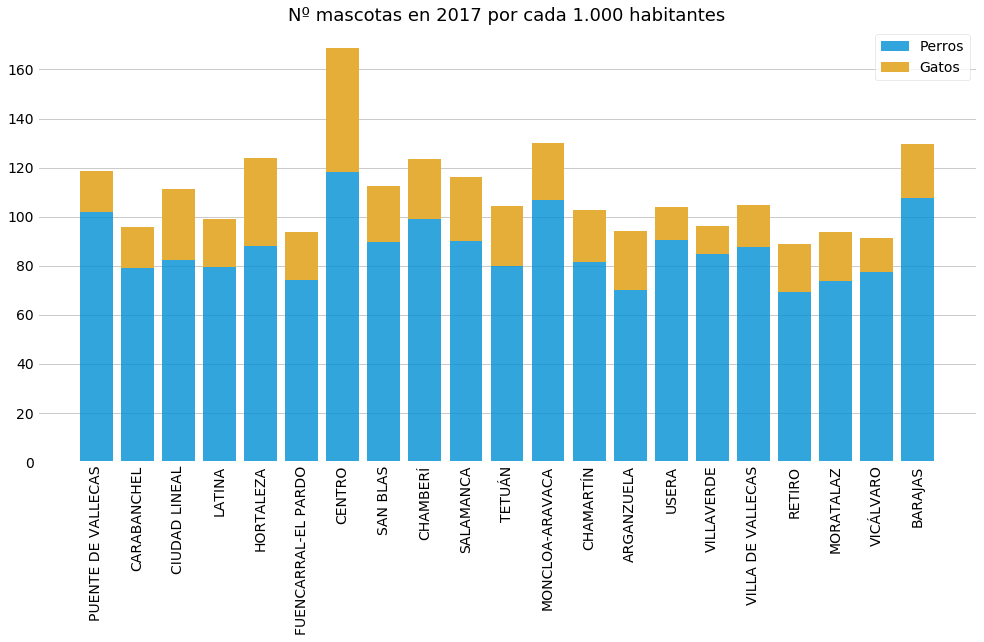

In [25]:
# dibujar mascotas por distritos por cada 1.000 habitantes
distritos.sort_values(['total'], ascending = False, inplace = True)

x = distritos['distrito']
y1 = distritos['perros/hab']
y2 = distritos['gatos/hab']

plt.bar(x, y1, alpha=0.8, color=sns.color_palette()[0], label = 'Perros')
plt.bar(x, y2, alpha=1, color=sns.color_palette()[2], bottom = y1, label = 'Gatos')

plt.xticks(x,rotation = 90)
plt.grid(axis='y')
plt.legend()
plt.title('Nº mascotas en 2017 por cada 1.000 habitantes',fontsize= 18)
plt.savefig('images/mascotas_2017_hab.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

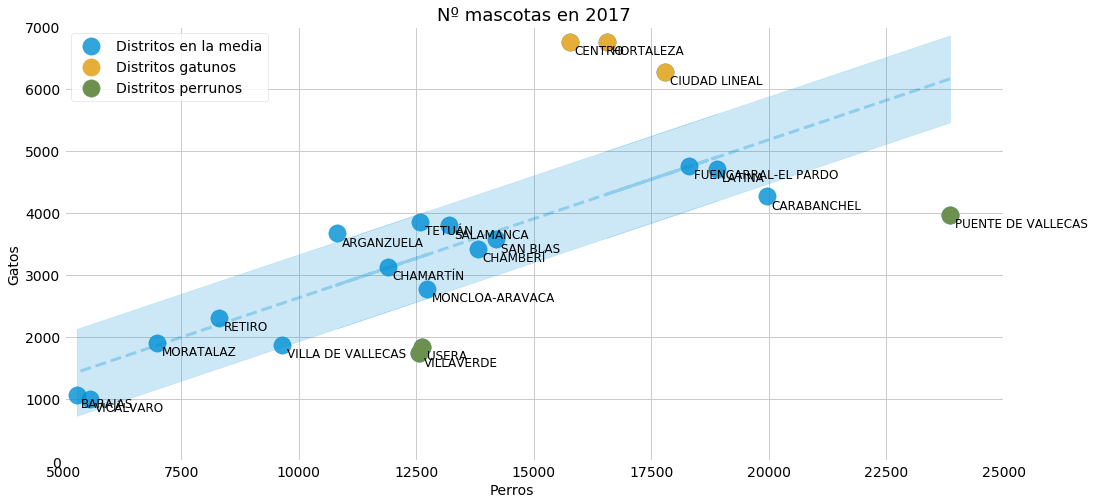

In [26]:
# dibujar relación entre perros y gatos por distritos
x = distritos['perros']
y = distritos['gatos']
word = distritos['distrito']
plt.scatter(x, y, s =300, alpha=0.8, color=sns.color_palette()[0], label = 'Distritos en la media')
for i in range(0,len(x)):
    plt.text(x[i]+100, y[i]-200, word[i], fontsize=12)

# Dibujar la curva de regresión y un rango de baja dispersión
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'--',color=sns.color_palette()[0], alpha=0.3, lw = 3)
plt.fill_between(x, p(x) -700, p(x) +700, alpha=0.2, color=sns.color_palette()[0])

# Marcar distritos gatunos
gatunos = ['CENTRO', 'CIUDAD LINEAL', 'HORTALEZA']
distritos_gatunos = distritos[distritos['distrito'].isin(gatunos)]
x = distritos_gatunos['perros']
y = distritos_gatunos['gatos']
plt.scatter(x, y, s =300, alpha=1, color=sns.color_palette()[2], label = 'Distritos gatunos')

# Marcar distritos perrunos
perrunos = ['PUENTE DE VALLECAS', 'USERA', 'VILLAVERDE']
distritos_perrunos = distritos[distritos['distrito'].isin(perrunos)]
x = distritos_perrunos['perros']
y = distritos_perrunos['gatos']
plt.scatter(x, y, s =300, alpha=1, color=sns.color_palette()[3], label = 'Distritos perrunos')


plt.grid(axis='y')
plt.grid(axis='x')
plt.axis(xmin= 5000 , xmax=25000)
plt.axis(ymin= 0 , ymax=7000)
plt.xlabel('Perros', rotation=0, ha = 'right')
plt.ylabel('Gatos', rotation=90, ha = 'right')
plt.legend()
plt.title('Nº mascotas en 2017',fontsize= 18)
plt.savefig('images/mascotas_distritos.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()

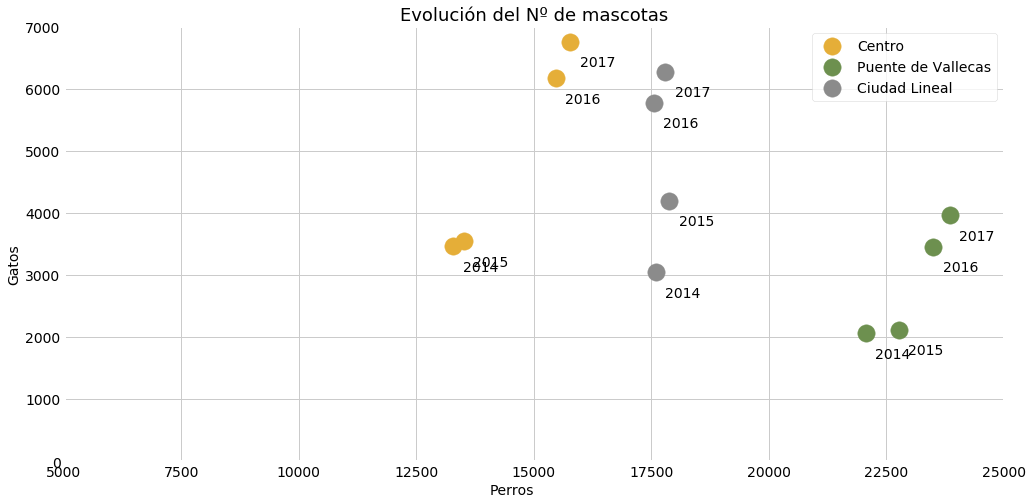

In [27]:
# dibujar evolución en el tiempo de relación entre perros y gatos en distrito Centro
evol = mas[mas['distrito'] == 'CENTRO'].reset_index()
x = evol['perros']
y = evol['gatos']
word= evol['year']
plt.scatter(x, y, s =300, alpha=1, color=sns.color_palette()[2], label = 'Centro')
for i in range(0,len(x)):
    plt.text(x[i]+200, y[i]-400, word[i], fontsize=14)
    
# dibujar evolución en el tiempo de relación entre perros y gatos en distrito Puente de Vallecas
evol = mas[mas['distrito'] == 'PUENTE DE VALLECAS'].reset_index()
x = evol['perros']
y = evol['gatos']
word= evol['year']
plt.scatter(x, y, s =300, alpha=1, color=sns.color_palette()[3],label = 'Puente de Vallecas')
for i in range(0,len(x)):
    plt.text(x[i]+200, y[i]-400, word[i], fontsize=14)
    
# dibujar evolución en el tiempo de relación entre perros y gatos en distrito Ciudad Lineal
evol = mas[mas['distrito'] == 'CIUDAD LINEAL'].reset_index()
x = evol['perros']
y = evol['gatos']
word= evol['year']
plt.scatter(x, y, s =300, alpha=1, color=sns.color_palette()[4],label = 'Ciudad Lineal')
for i in range(0,len(x)):
    plt.text(x[i]+200, y[i]-400, word[i], fontsize=14)

plt.grid(axis='y')
plt.grid(axis='x')
plt.axis(xmin= 5000 , xmax=25000)
plt.axis(ymin= 0 , ymax=7000)
plt.xlabel('Perros', rotation=0, ha = 'right')
plt.ylabel('Gatos', rotation=90, ha = 'right')
plt.legend()
plt.title('Evolución del Nº de mascotas',fontsize= 18)
plt.savefig('images/mascotas_distritos_evol.png', bbox_inches='tight', pad_inches=0.3, dpi=220, facecolor='white')
plt.show()